In [ ]:
'''Assignment on Regression technique.
Download temperature data from the link below.
https://www.kaggle.com/venky73/temperaturesof-india?select=temperatures.csv
This data consists of temperatures of INDIA averaging the temperatures of all places month
wise. Temperatures values are recorded in CELSIUS
a) Apply Linear Regression using a suitable library function and predict the Month-wise
temperature.
b) Assess the performance of regression models using MSE, MAE and R-Square metrics
c) Visualize a simple regression model.'''

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv("/content/archive (2).zip")
df = data

In [ ]:
data.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,1959.000000,23.687436,25.597863,29.085983,31.975812,33.565299,32.774274,31.035897,30.507692,30.486752,29.766581,27.285470,24.608291,29.181368,24.629573,31.517607,31.198205,27.208120
std,33.919021,0.834588,1.150757,1.068451,0.889478,0.724905,0.633132,0.468818,0.476312,0.544295,0.705492,0.714518,0.782644,0.555555,0.911239,0.740585,0.420508,0.672003
min,1901.000000,22.000000,22.830000,26.680000,30.010000,31.930000,31.100000,29.760000,29.310000,29.070000,27.900000,25.700000,23.020000,28.110000,22.250000,29.920000,30.240000,25.740000
25%,1930.000000,23.100000,24.780000,28.370000,31.460000,33.110000,32.340000,30.740000,30.180000,30.120000,29.380000,26.790000,24.040000,28.760000,24.110000,31.040000,30.920000,26.700000
50%,1959.000000,23.680000,25.480000,29.040000,31.950000,33.510000,32.730000,31.000000,30.540000,30.520000,29.780000,27.300000,24.660000,29.090000,24.530000,31.470000,31.190000,27.210000
75%,1988.000000,24.180000,26.310000,29.610000,32.420000,34.030000,33.180000,31.330000,30.760000,30.810000,30.170000,27.720000,25.110000,29.470000,25.150000,31.890000,31.400000,27.610000
max,2017.000000,26.940000,29.720000,32.620000,35.380000,35.840000,34.480000,32.760000,31.840000,32.220000,32.290000,30.110000,28.010000,31.630000,28.330000,34.570000,32.410000,30.030000


In [ ]:
data.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57


In [ ]:
data.tail()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
112,2013,24.56,26.59,30.62,32.66,34.46,32.44,31.07,30.76,31.04,30.27,27.83,25.37,29.81,25.58,32.58,31.33,27.83
113,2014,23.83,25.97,28.95,32.74,33.77,34.15,31.85,31.32,30.68,30.29,28.05,25.08,29.72,24.90,31.82,32.00,27.81
114,2015,24.58,26.89,29.07,31.87,34.09,32.48,31.88,31.52,31.55,31.04,28.10,25.67,29.90,25.74,31.68,31.87,28.27
115,2016,26.94,29.72,32.62,35.38,35.72,34.03,31.64,31.79,31.66,31.98,30.11,28.01,31.63,28.33,34.57,32.28,30.03
116,2017,26.45,29.46,31.60,34.95,35.84,33.82,31.88,31.72,32.22,32.29,29.60,27.18,31.42,27.95,34.13,32.41,29.69


In [ ]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   YEAR     117 non-null    int64  
 1   JAN      117 non-null    float64
 2   FEB      117 non-null    float64
 3   MAR      117 non-null    float64
 4   APR      117 non-null    float64
 5   MAY      117 non-null    float64
 6   JUN      117 non-null    float64
 7   JUL      117 non-null    float64
 8   AUG      117 non-null    float64
 9   SEP      117 non-null    float64
 10  OCT      117 non-null    float64
 11  NOV      117 non-null    float64
 12  DEC      117 non-null    float64
 13  ANNUAL   117 non-null    float64
 14  JAN-FEB  117 non-null    float64
 15  MAR-MAY  117 non-null    float64
 16  JUN-SEP  117 non-null    float64
 17  OCT-DEC  117 non-null    float64
dtypes: float64(17), int64(1)
memory usage: 16.6 KB


In [ ]:
print(data.columns)

Index(['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC', 'ANNUAL', 'JAN-FEB', 'MAR-MAY', 'JUN-SEP',
       'OCT-DEC'],
      dtype='object')


In [ ]:
print(data.head())

   YEAR    JAN    FEB    MAR    APR    MAY    JUN    JUL    AUG    SEP    OCT  \
0  1901  22.40  24.14  29.07  31.91  33.41  33.18  31.21  30.39  30.47  29.97   
1  1902  24.93  26.58  29.77  31.78  33.73  32.91  30.92  30.73  29.80  29.12   
2  1903  23.44  25.03  27.83  31.39  32.91  33.00  31.34  29.98  29.85  29.04   
3  1904  22.50  24.73  28.21  32.02  32.64  32.07  30.36  30.09  30.04  29.20   
4  1905  22.00  22.83  26.68  30.01  33.32  33.25  31.44  30.68  30.12  30.67   

     NOV    DEC  ANNUAL  JAN-FEB  MAR-MAY  JUN-SEP  OCT-DEC  
0  27.31  24.49   28.96    23.27    31.46    31.27    27.25  
1  26.31  24.04   29.22    25.75    31.76    31.09    26.49  
2  26.08  23.65   28.47    24.24    30.71    30.92    26.26  
3  26.36  23.63   28.49    23.62    30.95    30.66    26.40  
4  27.52  23.82   28.30    22.25    30.00    31.33    26.57  


In [ ]:
feature_column = 'JAN'
X = data[feature_column].values.reshape(-1, 1)
y = data['ANNUAL'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
#Assess the performance of regression models using MSE, MAE and R-Square metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-Square:", r2)



Mean Squared Error (MSE): 0.15781479264419376
Mean Absolute Error (MAE): 0.33668978017425494
R-Square: 0.6735879362042251


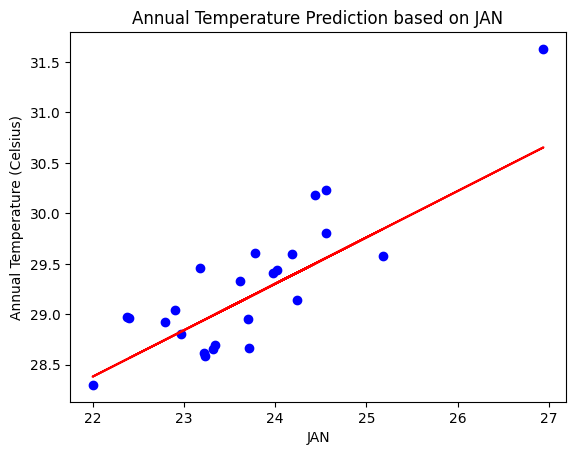

In [ ]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.xlabel(feature_column)
plt.ylabel('Annual Temperature (Celsius)')
plt.title(f'Annual Temperature Prediction based on {feature_column}')
plt.show()

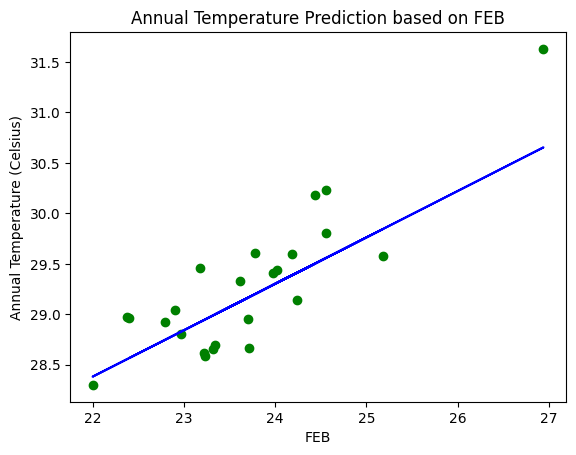

In [ ]:
feature_column = 'FEB'
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_pred, color='blue')
plt.xlabel(feature_column)
plt.ylabel('Annual Temperature (Celsius)')
plt.title(f'Annual Temperature Prediction based on {feature_column}')
plt.show()

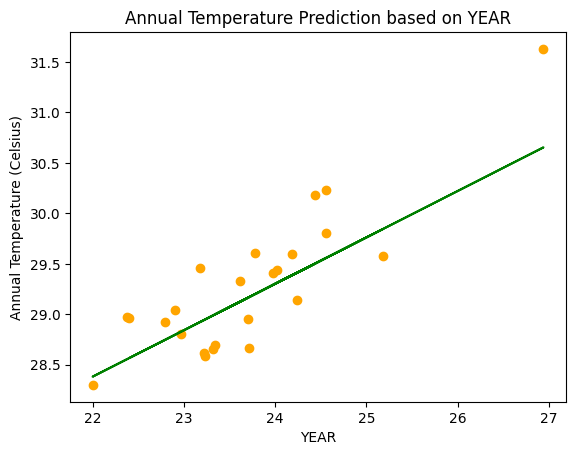

In [ ]:
feature_column = 'YEAR'
plt.scatter(X_test, y_test, color='orange')
plt.plot(X_test, y_pred, color='green')
plt.xlabel(feature_column)
plt.ylabel('Annual Temperature (Celsius)')
plt.title(f'Annual Temperature Prediction based on {feature_column}')
plt.show()

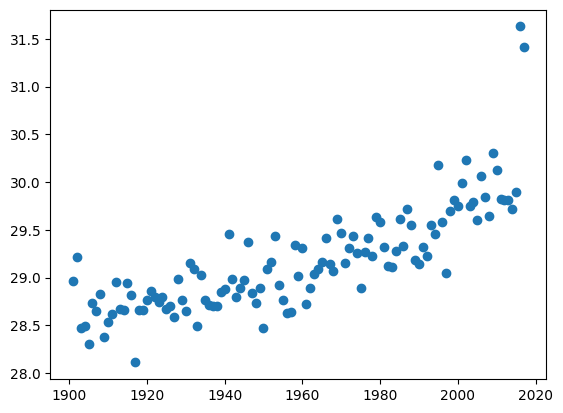

In [ ]:
plt.plot(x,y,'o')


<Axes: xlabel='YEAR'>

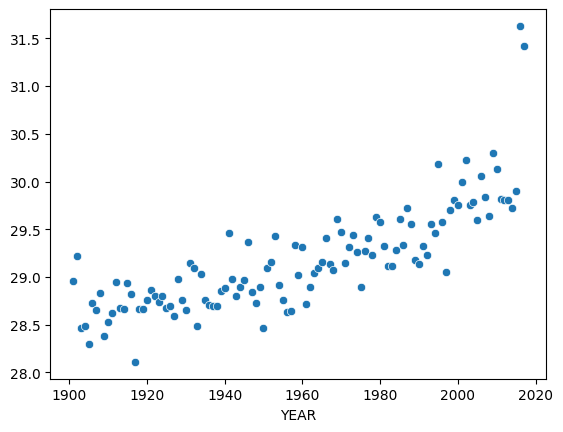

In [ ]:
sns.scatterplot(x=x,y=y,data=df)

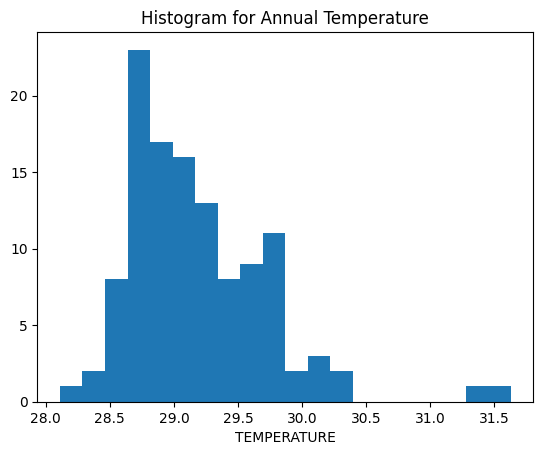

In [ ]:
plt.hist(df['ANNUAL'],bins=20)
plt.xlabel('TEMPERATURE')
plt.title('Histogram for Annual Temperature')
plt.show()